# Installl mecessity enviroment

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="once")

In [ ]:
plt.rcParams["figure.figsize"] = (16, 8)
plt.rcParams.update({'font.size': 16})

In [ ]:
plt.style.use('ggplot')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### An analysis of generated headings

In [ ]:
HR = pd.read_excel("/content/drive/MyDrive/course_work/work_with_starts/HR_metrics.xlsx")
small_gpt = pd.read_excel("/content/drive/MyDrive/course_work/work_with_starts/small_gpt_metrics.xlsx")
medium_gpt = pd.read_excel("/content/drive/MyDrive/course_work/work_with_starts/medium_gpt_metrics.xlsx")
dungeon = pd.read_excel("/content/drive/MyDrive/course_work/work_with_starts/unfinetuned_dungeon_metrics.xlsx")

In [ ]:
datasets = {"original": HR, "small_gpt": small_gpt, "medium_gpt": medium_gpt, "dungeon": dungeon}

### Metrcis descriptions

In [ ]:
feature_list = ['mess_len', 'n_words', 'n_punc', 'water',
                'unique_words', 'repeat', 'puke', 'n_stop']
desc_features = {"mess_len": "Длина сообщения, симв.", "n_words": "Количество слов", "n_punc": "Количество знаков препинания",
                 "water": "Степень водянистости", "unique_words": "Количество уникальных слов", "repeat": "Степень повторенности", 
                 "puke": "Абсолютная классическая тошнота", "n_stop": "Количество шумовых слов", "puke_rate": "Относительная классическая тошнота"}

### The historgrams of distributions 

In [ ]:
def make_histogramm(dataset, feature, model_name="Настоящие HR'ы"):
  plt.hist(dataset[feature], bins=20, color="orange")
  plt.xlabel(desc_features[feature])
  plt.ylabel("Частота появления, шт.")
  plt.show()
  None

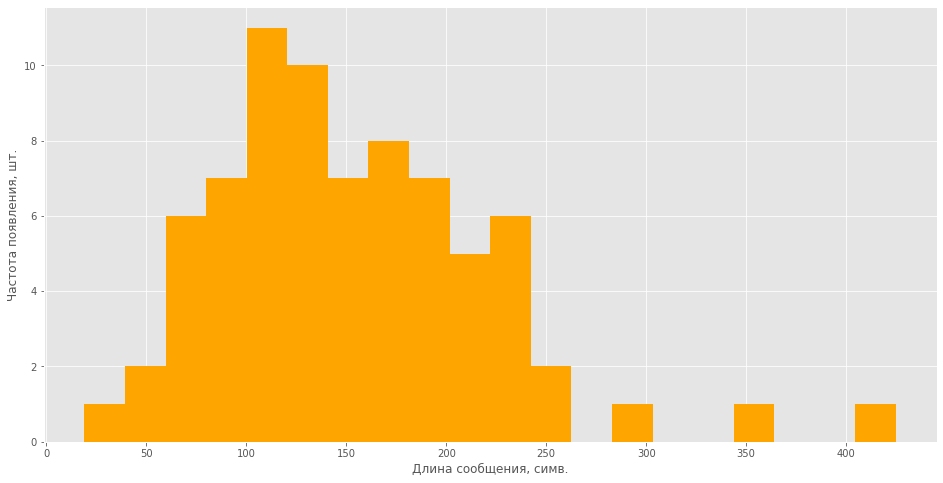

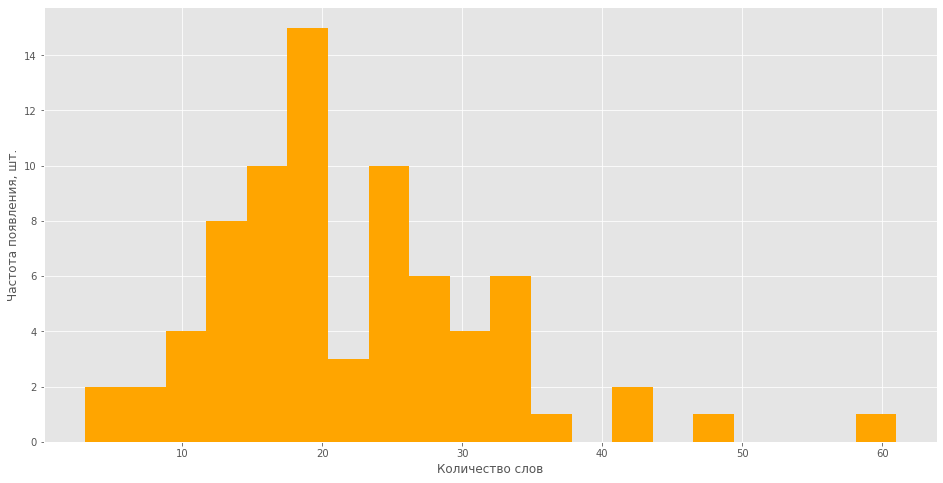

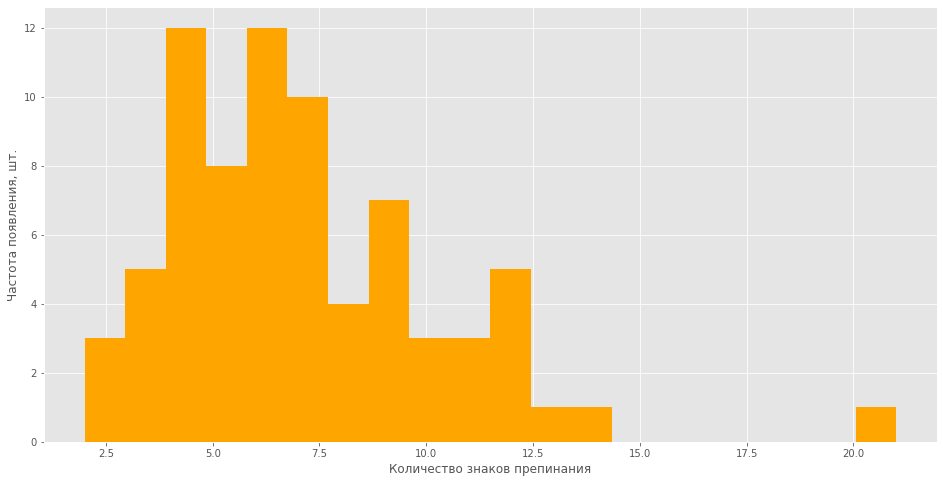

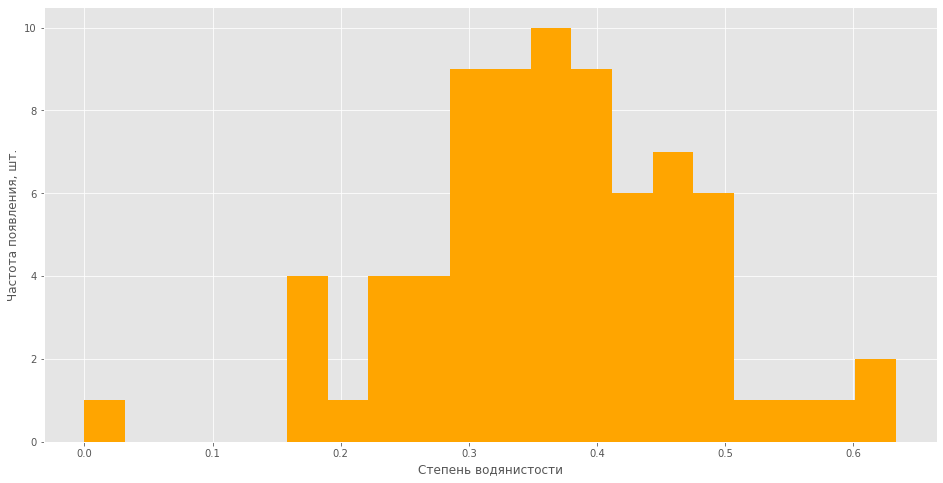

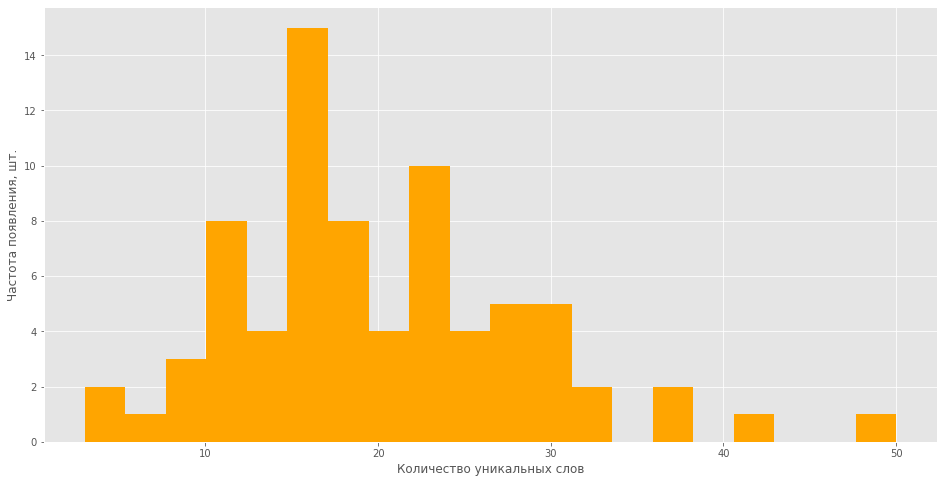

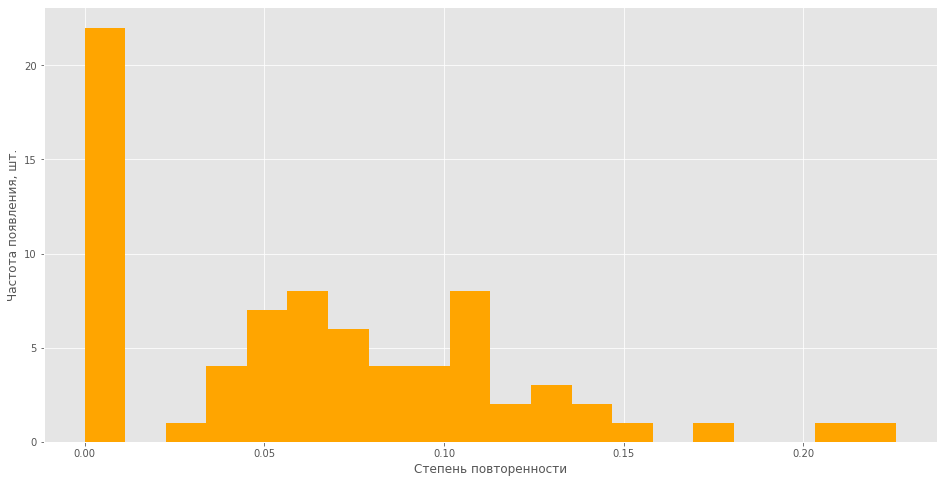

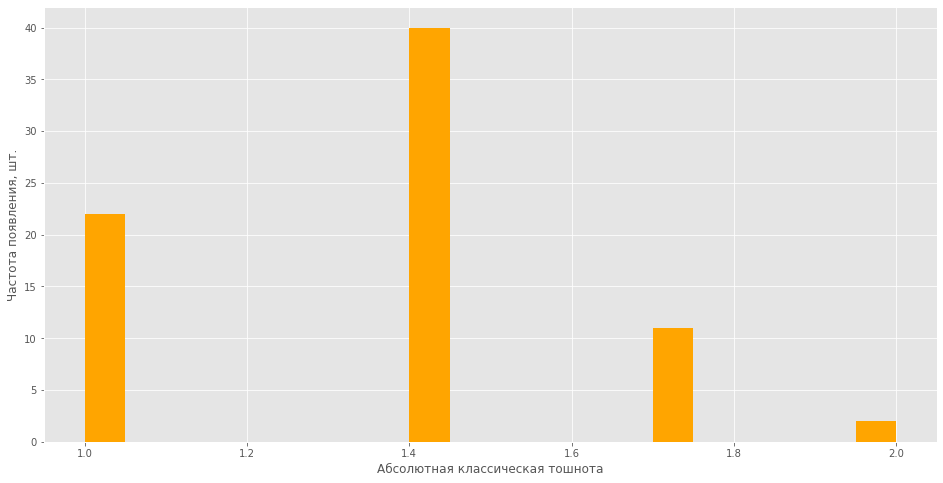

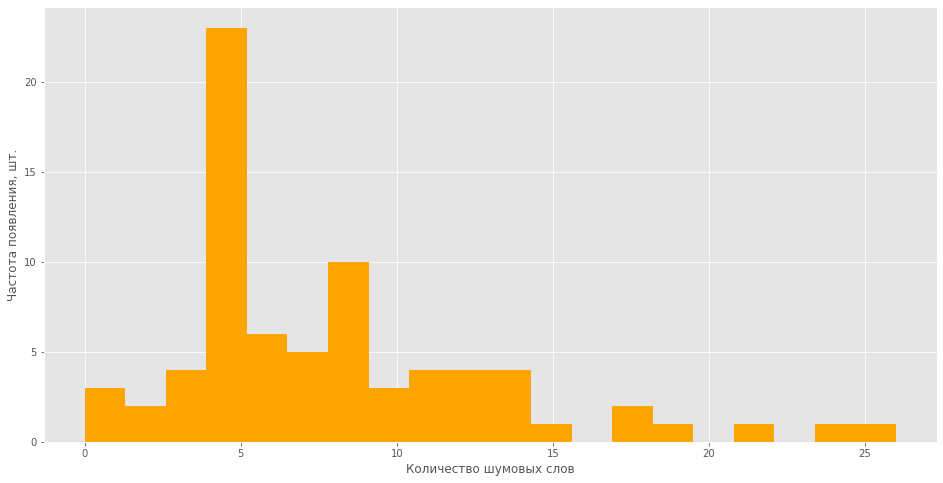

In [ ]:
for feature in feature_list:
  make_histogramm(HR, feature)

### The histograms of distributions for small_gpt



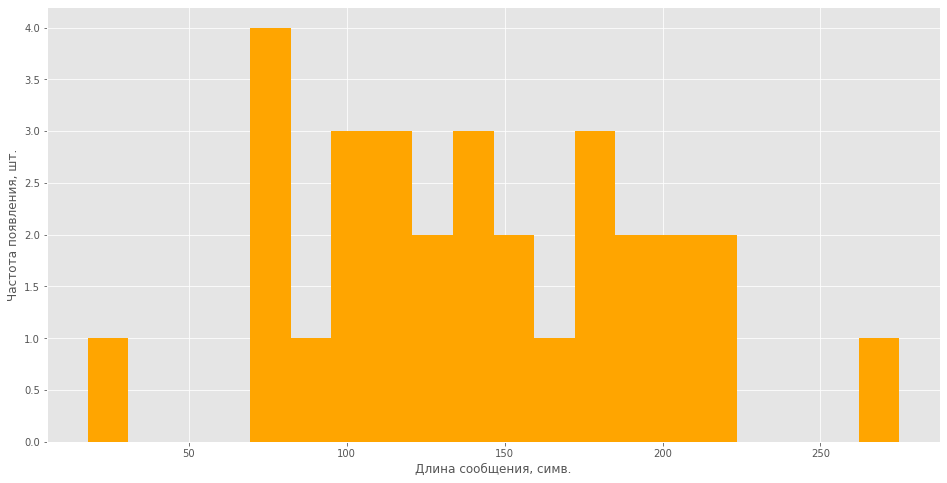

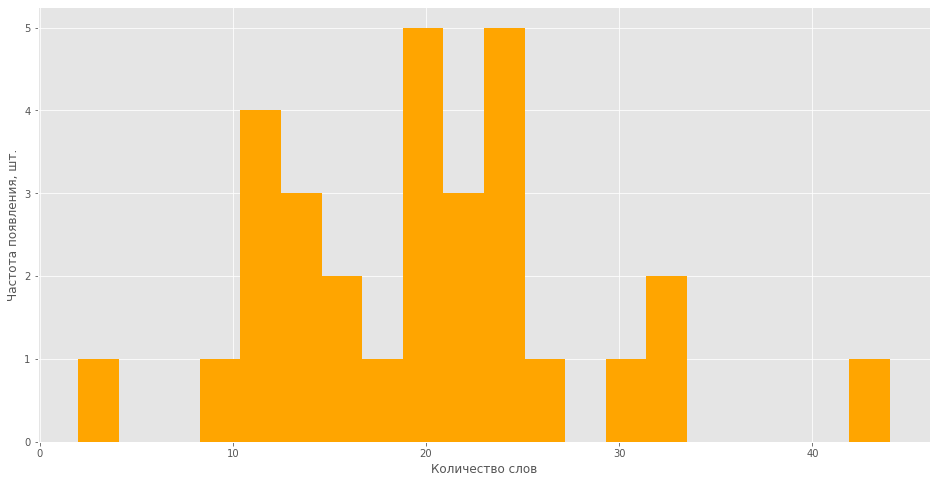

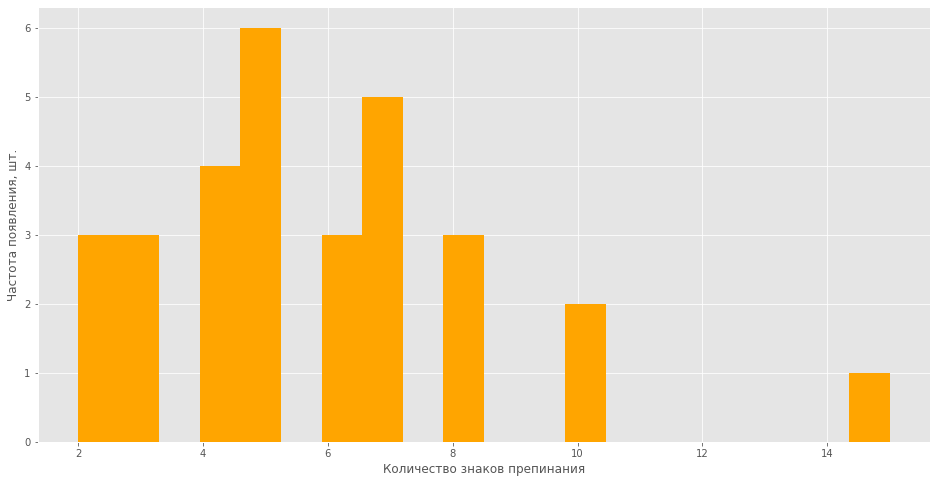

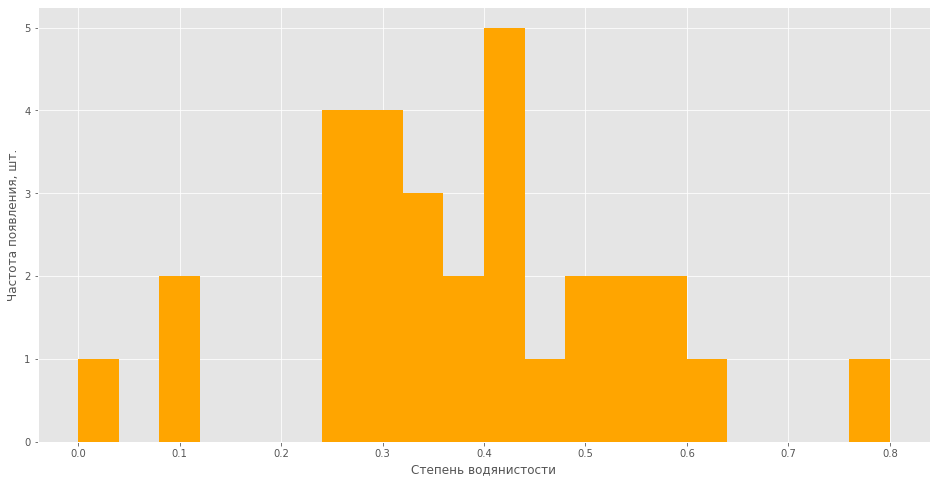

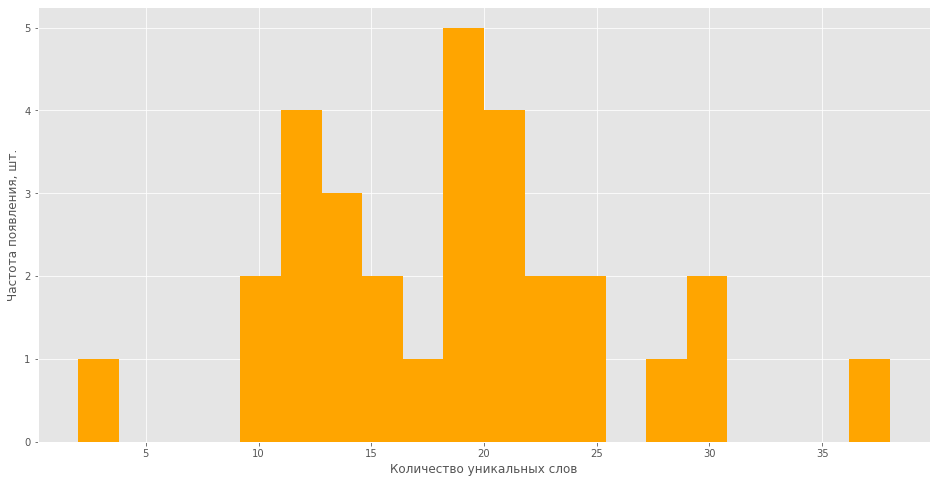

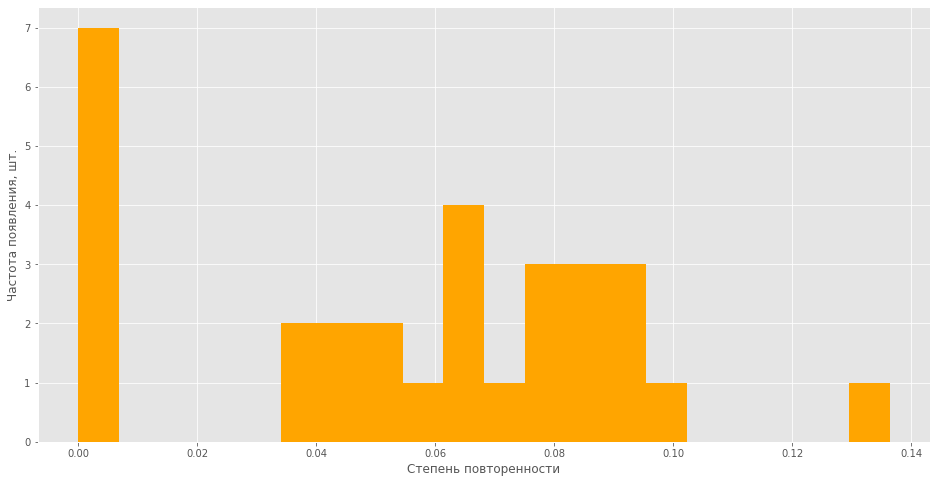

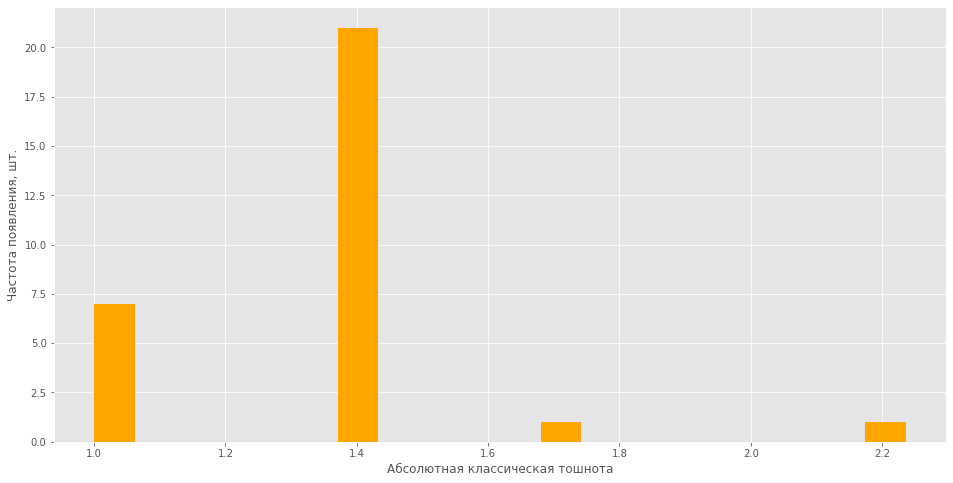

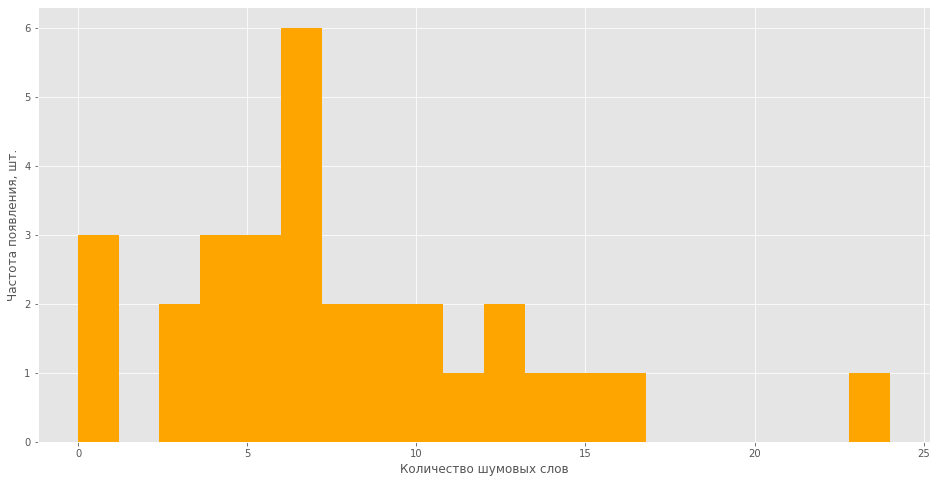

In [ ]:
for feature in feature_list:
  make_histogramm(small_gpt, feature)

### The histograms of distributions for medium_gpt


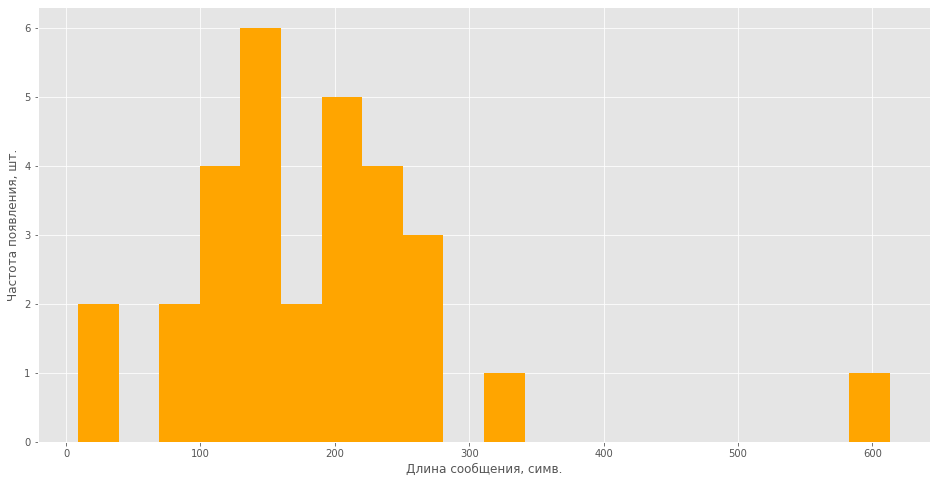

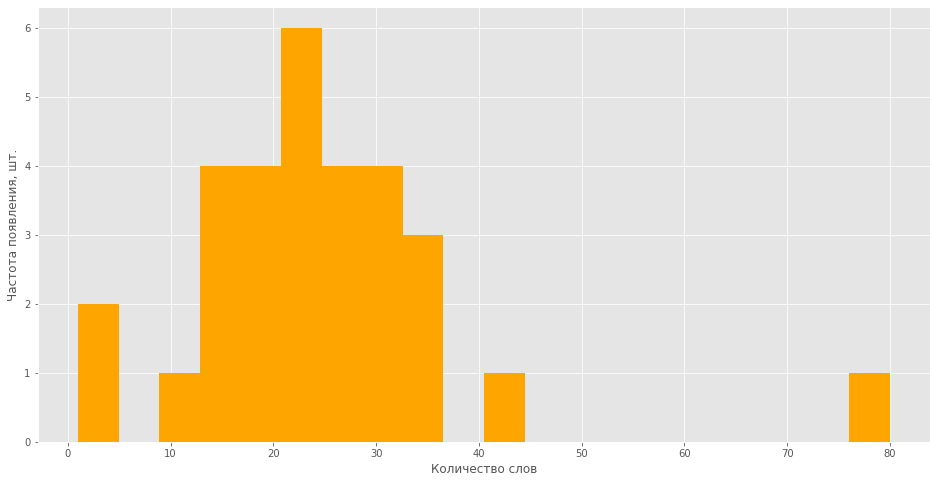

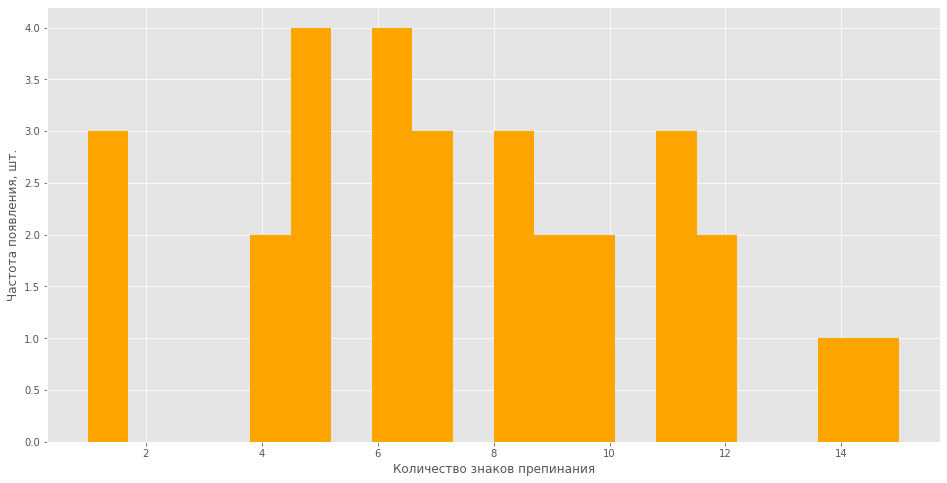

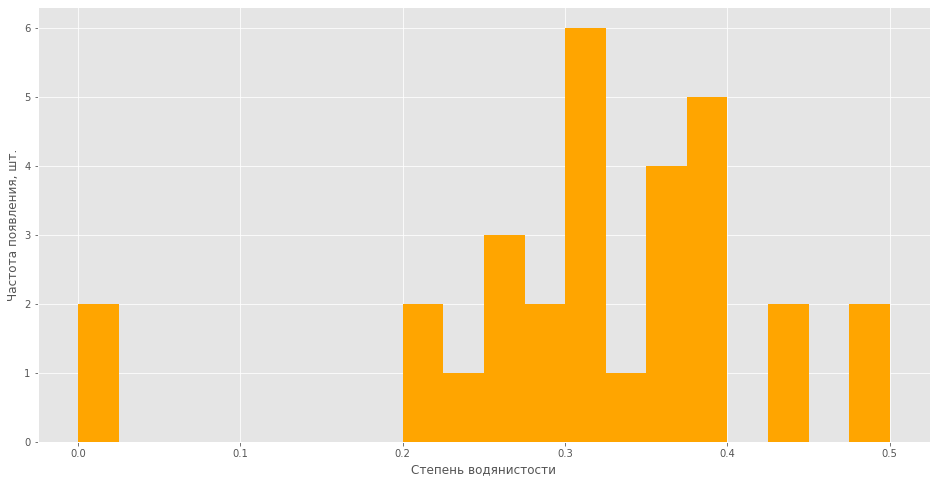

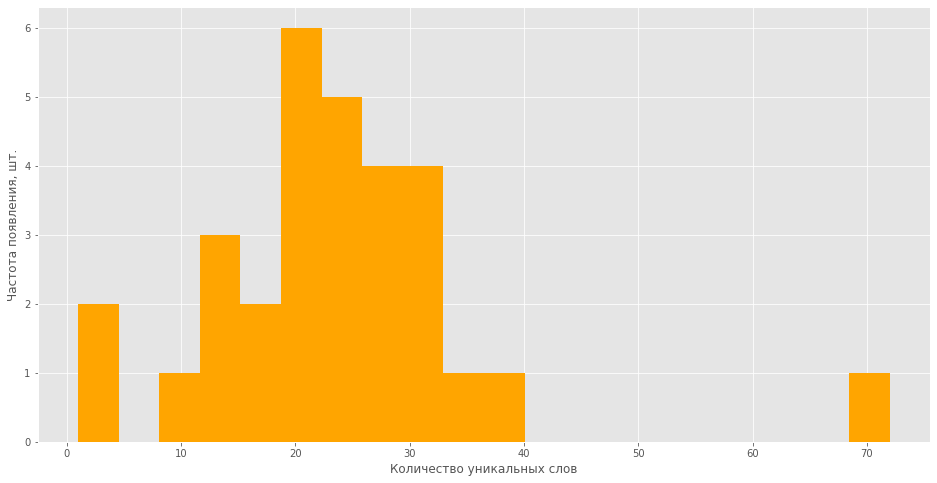

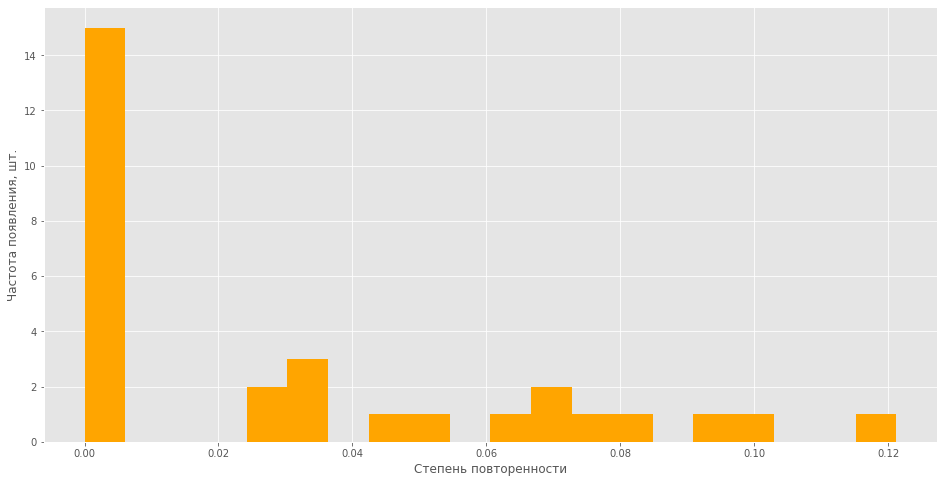

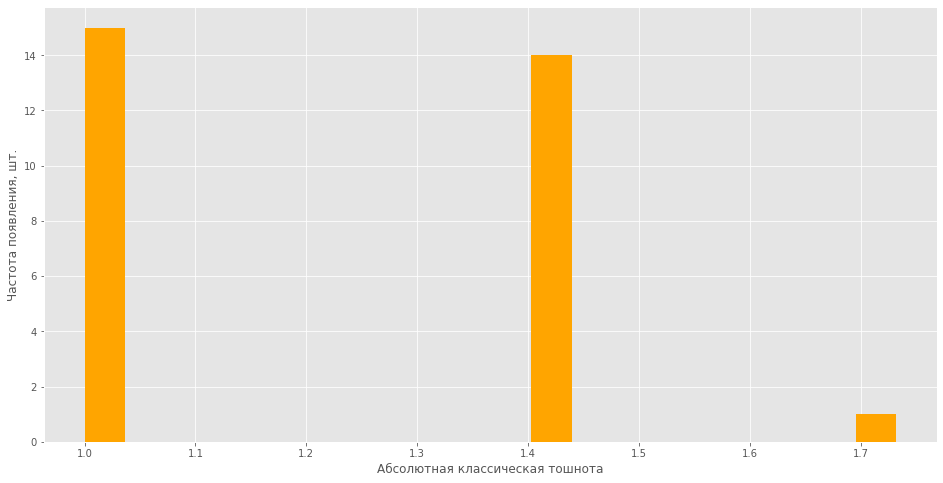

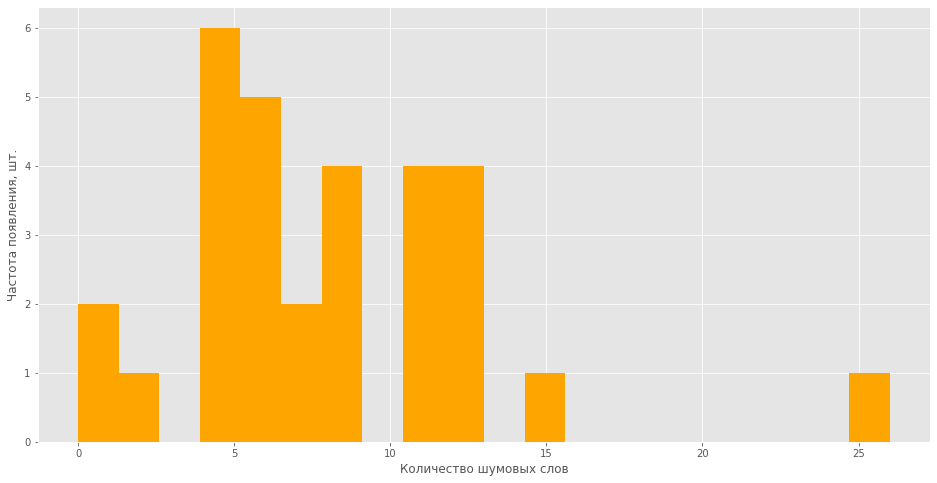

In [ ]:
for feature in feature_list:
  make_histogramm(medium_gpt, feature)

### The histograms of distributions for dungeon


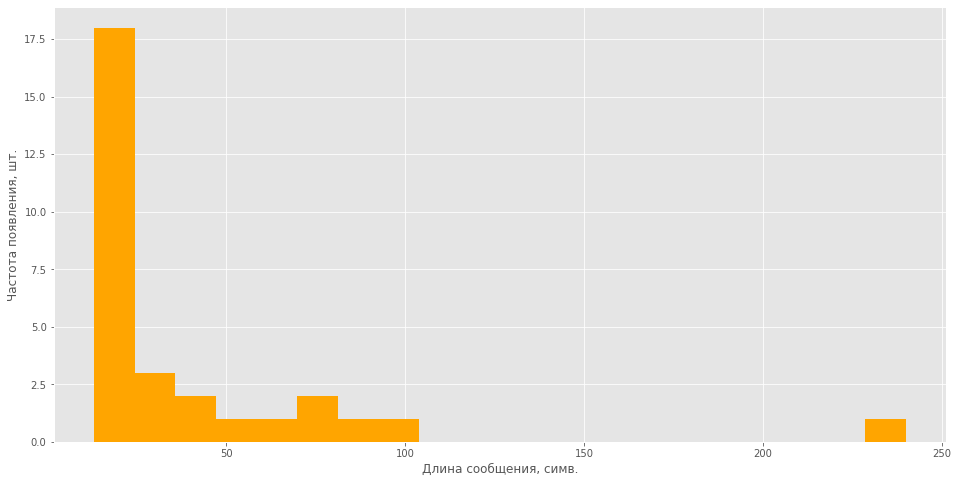

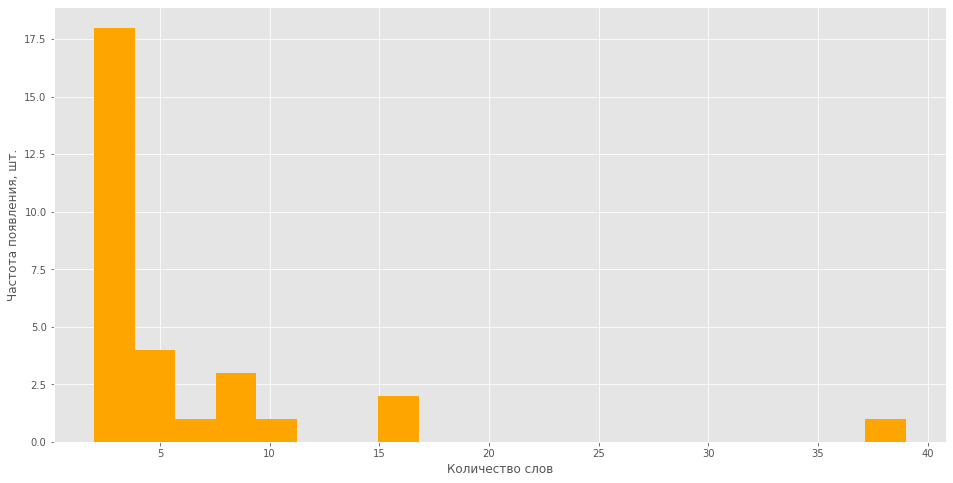

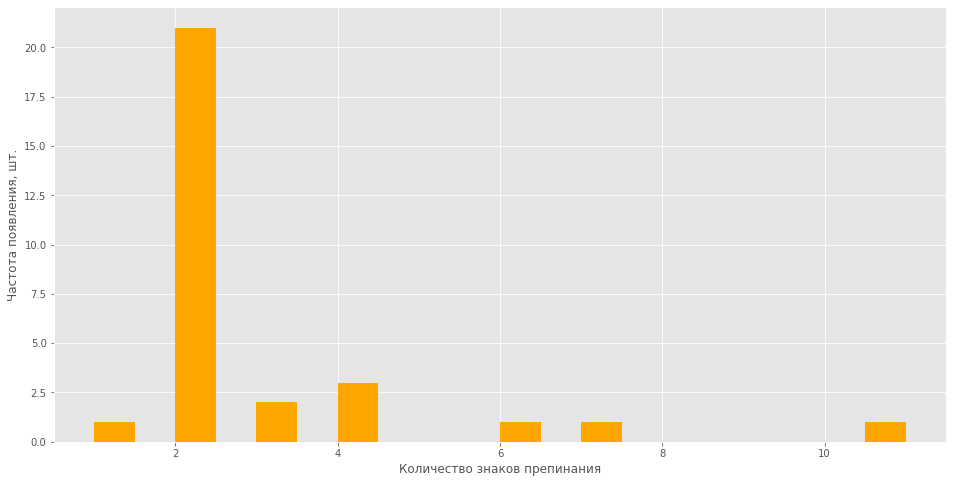

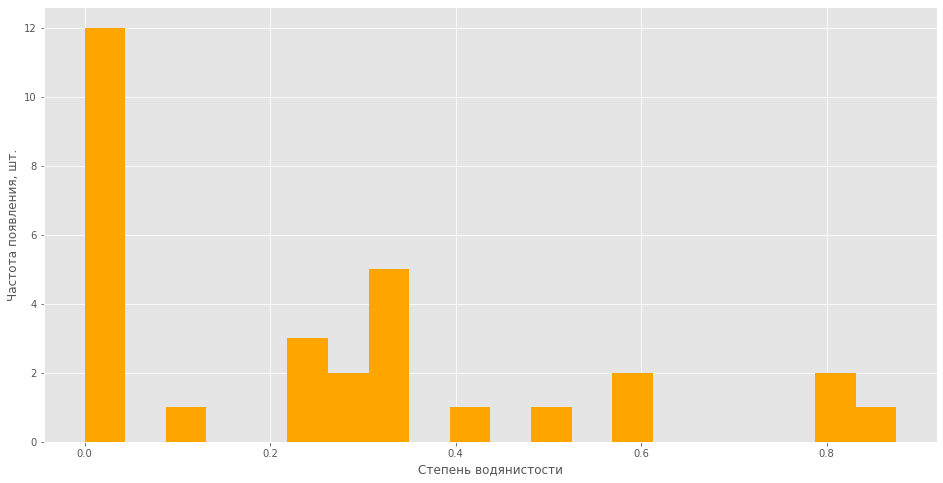

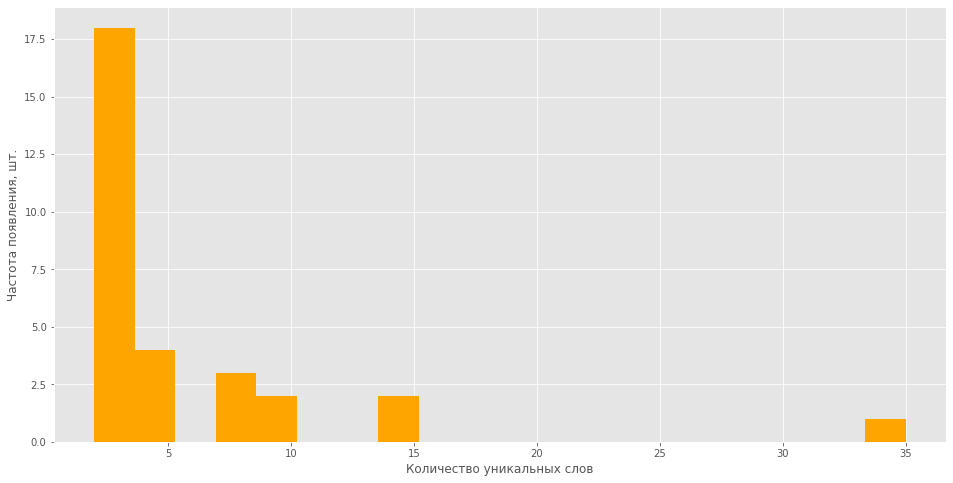

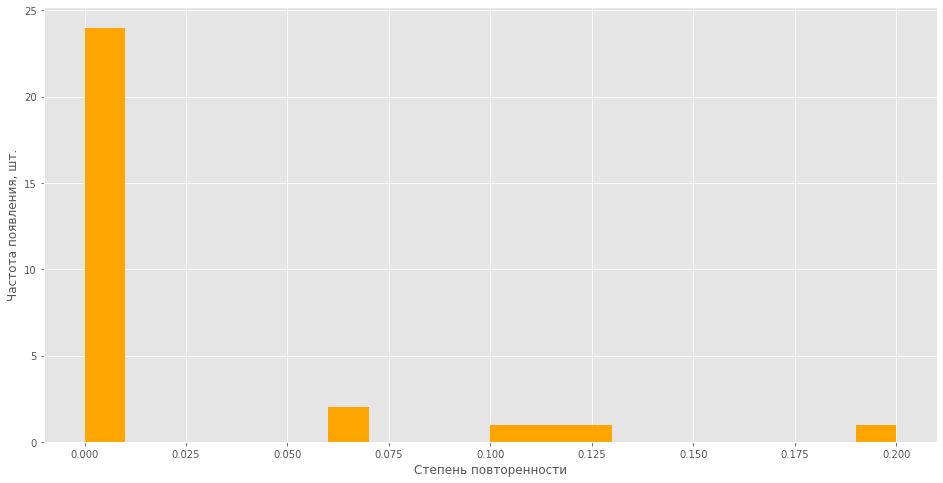

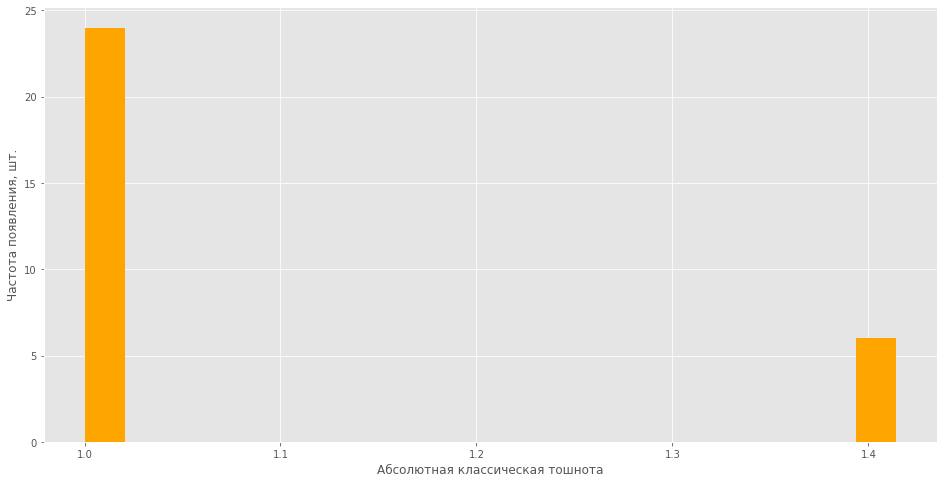

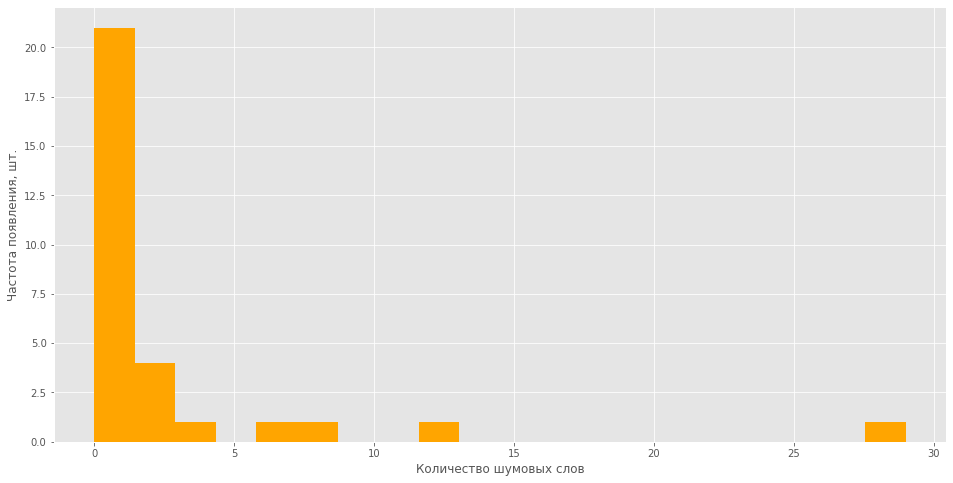

In [ ]:
for feature in feature_list:
  make_histogramm(dungeon, feature)

### Let's make smth like a table with the basic metrcis

### For start: max, min and mean value, median and std

In [ ]:
features = ["model", "feature", "max", "min", "mean", "median", "std"]

In [ ]:
base_metrics = pd.DataFrame(columns=features)

In [ ]:
base_metrics.head()

,model,feature,max,min,mean,median,std


In [ ]:
for dataset_name, dataset in datasets.items():
  for feature, feature_name in desc_features.items():
    line = {"model": dataset_name, "feature": feature, "max": dataset[feature].max(), "min": dataset[feature].min(),
            "mean": dataset[feature].mean(), "median": dataset[feature].median(), "std": dataset[feature].std()}
    base_metrics = base_metrics.append(line, ignore_index=True)


### Посмотрим на метрики моделей рядом
### Let's compare differences between some metrics of different models' architectures

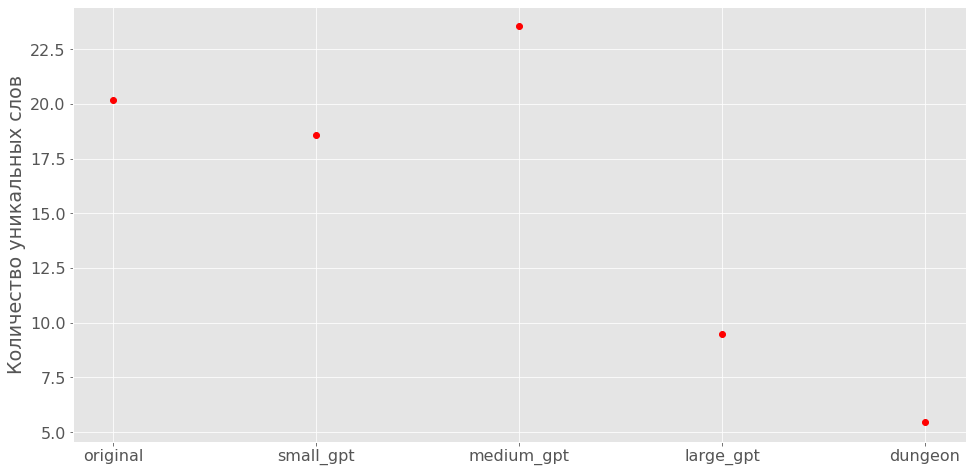

In [ ]:
plt.plot(list(datasets.keys()), base_metrics[base_metrics.feature == "unique_words"]["mean"], 'ro')
plt.ylabel("Количество уникальных слов")
plt.show()
None

добавим искомые сообщения в датасет с метриками

In [ ]:
HR_mess = pd.read_excel("/content/drive/MyDrive/course_work/Headings_wo_emoji.xlsx")['start']
small_gpt_mess = pd.read_excel("/content/drive/MyDrive/course_work/work_with_starts/small_gpt.xlsx")[0].values
medium_gpt_mess = pd.read_excel("/content/drive/MyDrive/course_work/work_with_starts/medium_gpt.xlsx")[0].values
dungeon_mess = pd.read_excel("/content/drive/MyDrive/course_work/work_with_starts/unfinetuned_dungeon.xlsx")[0].values

In [ ]:
messages_sets = [HR_mess, small_gpt_mess, medium_gpt_mess, dungeon_mess]
metrics_sets = [HR, small_gpt, medium_gpt, dungeon]

In [ ]:
for messages, metrics_set in zip(messages_sets, metrics_sets):
  metrics_set['message'] = messages

In [ ]:
'mess_len', 'n_words', 'n_unique',
                    'repeat_rate', 'puke', 'puke_rate', 'n_stop', 'water_rate',
                    'flash', 'n_punc'

### Let's save our metrics in the one big table 

In [ ]:
features = ["model", "feature", "max", "min", "mean", "median", "std"]

In [ ]:
base_stats = pd.DataFrame(columns=features)

In [ ]:
desc_features = {"mess_len": "Длина сообщения, симв.", "n_words": "Количество слов", "n_punc": "Количество знаков препинания",
                 "water": "Степень водянистости", "unique_words": "Количество уникальных слов", "repeat": "Степень повторенности", 
                 "puke": "Абсолютная классическая тошнота", "n_stop": "Количество шумовых слов", "puke_rate": "Относительная классическая тошнота"}

In [ ]:
for dataset_name, dataset in datasets.items():
  for feature, feature_name in desc_features.items():
    line = {"model": dataset_name, "feature": feature, "max": dataset[feature].max(), "min": dataset[feature].min(),
            "mean": dataset[feature].mean(), "median": dataset[feature].median(), "std": dataset[feature].std()}
    base_stats = base_stats.append(line, ignore_index=True)


In [ ]:
HR['model'] = "original"
small_gpt['model'] = "small_gpt"
medium_gpt['model'] = "medium_gpt"
dungeon['model'] = "dungeon"

In [ ]:
all_metrics_set = pd.concat([HR, small_gpt, medium_gpt, large_gpt, dungeon], ignore_index=True)

In [ ]:
all_metrics_set.to_excel("all_metrics.xlsx")
base_stats.to_excel("base_statistics.xlsx")